проект

# Выявление закономерностей определяющих успешность игры 

## Цель проекта:

Выявить закономерности определяющие успешность игры 

## Описание проекта:

Интернет-магазине «Стримчик», продающий по всему миру компьютерные игры. 

Закономерности успешности игры позволят сделать ставку на потенциально популярный продукт 
и спланировать рекламные кампании.
Нужно отработать принцип работы с данными. 
Аббревиатура ESRB (Entertainment Software Rating Board) — ассоциация, 
определяющая возрастной рейтинг компьютерных игр: «Для взрослых», «Для детей младшего возраста», «Для подростков».

Доступны данные до 2016 года:

- Name — название игры

- Platform — платформа

- Year_of_Release — год выпуска

- Genre — жанр игры

- NA_sales — продажи в Северной Америке (миллионы проданных копий)

- EU_sales — продажи в Европе (миллионы проданных копий)

- JP_sales — продажи в Японии (миллионы проданных копий)

- Other_sales — продажи в других странах (миллионы проданных копий)

- Critic_Score — оценка критиков (максимум 100)

- User_Score — оценка пользователей (максимум 10)

- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация - определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


<a name="0"></a>
### Оглавление:

#### [1. Данные. Общая информация.](#1)

#### [2. Подготовка данных](#2)

[2.1 Замена названия столбцов (приведение к нижнему регистру)](#2.1)

[2.2 Преобразование данных в нужные типы](#2.2)

[2.3 Обработка пропусков](#2.3)

[2.4 Cуммарные продажи во всех регионах](#2.4)

#### [3. Исследовательский анализ данных.](#3)

#### [4. Портрет пользователя каждого региона.](#4)

#### [5. Проверка гипотез.](#5)

[5.1 Проверка гипотезы H0](#5.1)

[5.1 Проверка гипотезы H1](#5.2)

#### [6. Вывод.](#6)

<a name="1"></a>
## 1. Данные. Общая информация.

In [31]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats as st
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [32]:
df = pd.read_csv('/datasets/games.csv')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [34]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [35]:
df.duplicated().sum()

0

#### Вывод:

1. Данные содержат 16715 записей

2. Типы данных *float64, object* 

3. Категориальные и количественные данные

4. Полные дубликаты отсутствуют

<a name="2"></a>
[Назад к оглавлению](#0)
## 2.  Подготовка данных

<a name="2.1"></a>
[Назад к оглавлению](#0)
### 2.1 Замена названия столбцов (приведение к нижнему регистру)

In [36]:
df.columns = df.columns.str.lower()

<a name="2.2"></a>
[Назад к оглавлению](#0)
### 2.2 Преобразование данных в нужные типы

**year_of_release** - тип данных float64 преобразовывать в формат datetime не будем. На данном этапе в текущем формате анализ проводить возможно - после обработки пропусков в столбце меняем на тип данных int.

<div class="alert alert-block alert-info">

   
Добавлена информация об изменении типа на int.
    
</div>

Для анализа определим значения категорий столбца **rating**

In [37]:
df.rating.value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

E - («Everyone») — «Для всех»

T - («Teen») — «Подросткам»

M - («Mature») — «Для взрослых»

E10+ - («Everyone 10 and older») — «Для всех от 10 лет и старше»  

EC - («Early childhood») — «Для детей младшего возраста»   

K-A           

RP - («Rating Pending») — «Рейтинг ожидается»        

AO - («Adults Only 18+») — «Только для взрослых»

####  Вывод:

1. Тип данных столбца **year_of_release** изменим на int в следующем разделе. 

2. Получено описание возрастных категорий столбца **rating**

<div class="alert alert-block alert-warning">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
    
Кажется ты что-то напутал \ опечатался, у нас по имени и жанру тип не float, а object, плюс категориальные признаки нет смысла переводить в datetime. Полагаю ты вообще имел в виду год, да?

</div>

<a name="2.3"></a>
[Назад к оглавлению](#0)
### 2.3 Обработка пропусков

Количество и доля пропущенных значений в таблице

In [38]:
df_NaN_part = pd.DataFrame(data = df.isna().sum(), columns = ['NaN'])
df_NaN_part['NaN_part'] = round(df.isna().sum() / len(df) * 100, 2)
df_NaN_part = df_NaN_part.query('NaN != 0')
df_NaN_part

,NaN,NaN_part
name,2,0.01
year_of_release,269,1.61
genre,2,0.01
critic_score,8578,51.32
user_score,6701,40.09
rating,6766,40.48


**name, year_of_release, genre, critic_score, user_score, rating** - имеют пропуски типа NAN. Посмотрим по каждому столбцу 

**year_of_release** пропуски в количестве 1,6% заменим на значение 0 для обработки и сортировки по годам, значение 0 означает отсутствие информации

In [39]:
df.year_of_release = df.year_of_release.fillna(0)

In [40]:
df.year_of_release = df.year_of_release.astype(int)

In [41]:
df = df.dropna(subset = ['name'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


<div class="alert alert-block alert-info">

V1 
    
**user_score** имеет значения **tbd**, часто аббревиатура означает "to be determined" - "будет определено", возможно,  оценка пользователей не получена либо утерена на каком-либо этапе обработки данных. Заменим их на значение **NaN**  и будем обрабатывать как все пропуски.
    
</div>

In [43]:
#df[['critic_score', 'rating']] = df[['name', 'genre', 'critic_score', 'rating']].fillna(value = 'unknown')

In [44]:
df.user_score = pd.to_numeric(df.user_score, errors='coerce')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Вывод:

1. Наличие пропусков типа NaN значительное в столбцах **critic_score, user_score, rating** пока оставляем

2. 2 пропуска в стобцах **name** и **genre** удалены

3. Аббревиатура **tbd** для нас означает пропущенные(отсутствующие) значения.Значения заменены на **NaN**

Дополнительная обработка пропусков проведена при проверке гипотез в разделе 
[5. Проверка гипотез.](#5) с учетом всех дополнительных условий.

<div class="alert alert-block alert-info">

V1 
    
    
* год приведен к int
    
* пропуски оставлены в начальном виде
    
* tbd заменен на nan
    
</div>

<a name="2.4"></a>
[Назад к оглавлению](#0)
### 2.4 Cуммарные продажи во всех регионах

In [46]:
df['total_sales'] = df.na_sales + df.eu_sales + df.jp_sales + df.other_sales

In [47]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [48]:
df.sort_values(by = ['total_sales'], ascending = False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


#### Вывод:

1. Первоначальная таблица до обработки и подсчета **total_sales** была уже отсортирована по убыванию объемов общих продаж.

<a name="3"></a>
[Назад к оглавлению](#0)
## 3. Исследовательский анализ данных.

#### Выпуск игр в разные годы

Text(0, 0.5, 'год')

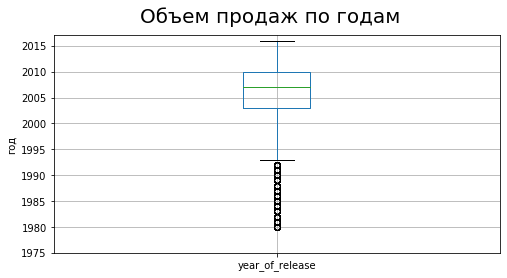

In [49]:
df.boxplot('year_of_release', figsize = (8,4))
plt.ylim(1975, 2017)
plt.suptitle('Объем продаж по годам', size = 20)
plt.ylabel('год')

Text(0, 0.5, 'объем продаж')

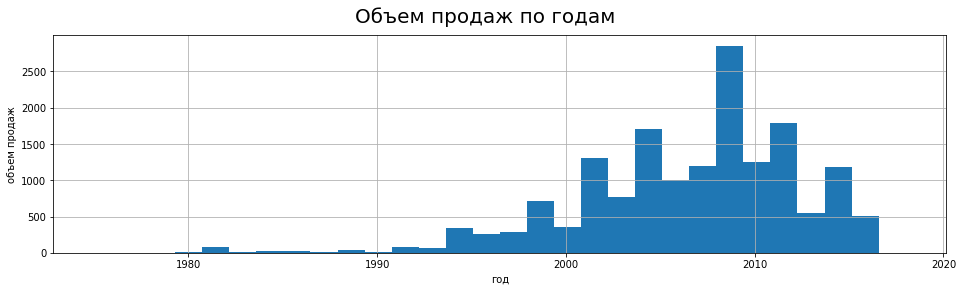

In [50]:
df.year_of_release.hist(bins = 30, figsize = (16, 4), range = (1975, 2018))
plt.suptitle('Объем продаж по годам', size = 20)
plt.xlabel('год')
plt.ylabel('объем продаж')

Text(0, 0.5, 'объем продаж')

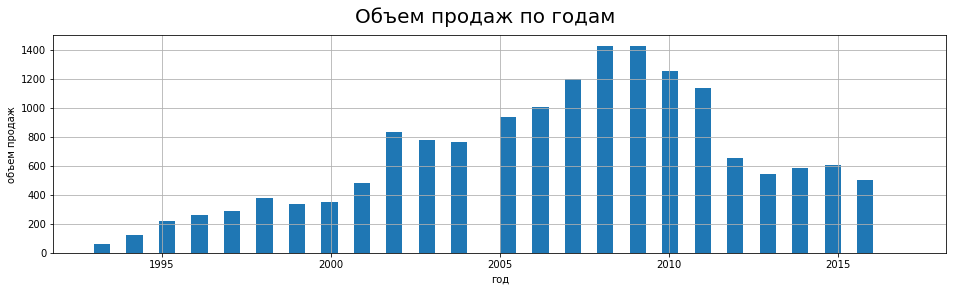

In [51]:
df.year_of_release.hist(bins = 50, figsize = (16, 4), range = (1993, 2017))
plt.suptitle('Объем продаж по годам', size = 20)
plt.xlabel('год')
plt.ylabel('объем продаж')

В рассчетах можно учитывать период выпуска игр 2002-2011 г.г. - период максимального выпуска игр. В этот момент наблюдается уверенный рост, который доходит до пика в 2008-2009 годах и далее начинается медленный спад. Такое поведение объясняется вероятно, свободной нишей в 90х годах, которая начинает активно заполняться и после насыщения начинается спад активности, либо это связано с тем, что игры сохраняют свои названия и приобретают номера частей и версии.

#### Анализ платформ.

In [52]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Возьмем для анализа период с 2002 года.

In [53]:
df = df.query('year_of_release >= 2002').reset_index()

In [54]:
df_platform_total_sales = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)

Text(0, 0.5, 'объем продаж')

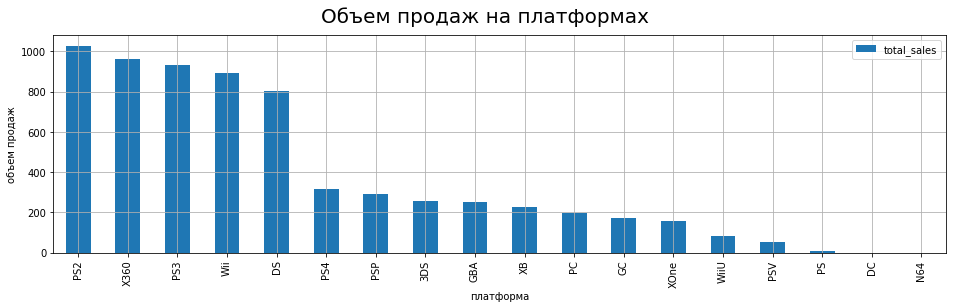

In [55]:
df_platform_total_sales.plot.bar(grid = True, figsize = (16, 4))
plt.suptitle('Объем продаж на платформах', size = 20)
plt.xlabel('платформа')
plt.ylabel('объем продаж')

In [56]:
df_platform_total_sales_max = df_platform_total_sales.query('total_sales > 600')

In [57]:
platform_max_list = df_platform_total_sales_max.index
platform_max_list

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

Из общего количества выделяется 6 платформ с максимальным уровнем суммарных продаж - более 600 млн. копий

platform_max_list = **PS2, X360, PS3, Wii, DS**

Сгруппируем данные объемов продаж для **platform_max_list** по годам 

In [58]:
df_platform_year_sales = df[df['platform'].isin(platform_max_list)]

In [59]:
df_platform_year_sales_pivot = df_platform_year_sales.pivot_table(index='year_of_release', columns = 'platform', values='total_sales', aggfunc='sum')

In [60]:
df_platform_year_sales_pivot

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41
2008,145.31,53.90,118.52,171.32,135.26
2009,119.54,26.40,130.93,206.97,120.29
2010,85.02,5.64,142.17,127.95,170.03


Пропуски типа NaN означают, что на данной платформе продаж в период времени не было. Заменять пропуски на 0 не будем, чтобы периоды отсутствия продаж не отражались как 0й уровень на графике

Text(0, 0.5, 'объем продаж')

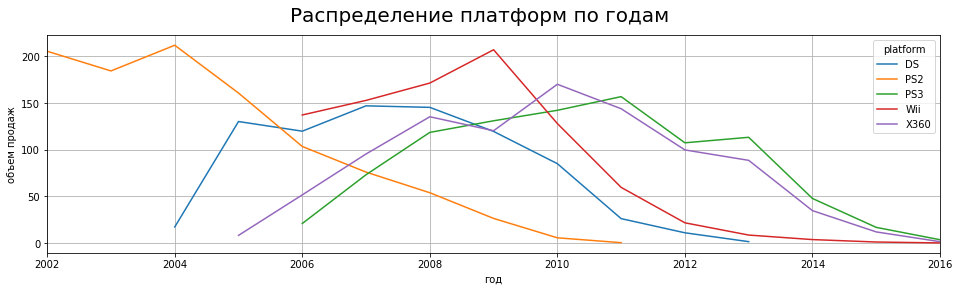

In [61]:
df_platform_year_sales_pivot.plot(grid = True, figsize = (16, 4))
plt.suptitle('Распределение платформ по годам', size = 20)
plt.xlabel('год')
plt.ylabel('объем продаж')

Из графика видно, как со временем менялись объемы продаж на разных платформах - одни платформы сменялись другими.

В 90х - единственная популярная платформа - **PS**, которая меняется в 2000х на **PS2**, далее с 2005 - **DS** и в завершение,

пик популярности 3х платформ **X360, PS3, Wii** приходится на 2010 год с постепенным снижением к 2016 году.

Характерное проявление - цикл смены платформ составляет примерно 10 лет.

Text(0, 0.5, 'объем продаж')

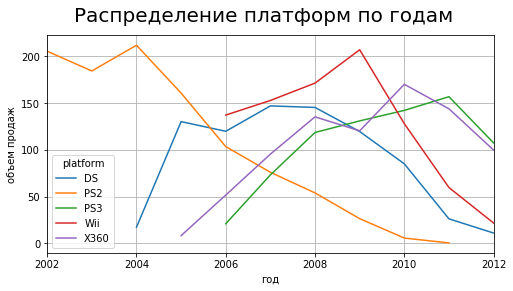

In [62]:
df_platform_year_sales_pivot.query('2000 < year_of_release < 2013').plot(grid = True, figsize = (8, 4))
plt.suptitle('Распределение платформ по годам', size = 20)
plt.xlabel('год')
plt.ylabel('объем продаж')

Актуальный период (2002-2011) демонстрирует максимальную активность по продажам на большинстве платформ на рынке.

При этом в 2006г. **PS2** теряет продажи, **X360, PS3, Wii, DS** - набирают рост

Выделим платформы **X360, PS3, Wii, DS** как наиболее перспективные и прибыльные.

In [1]:
import plotly.express as px

fig = px.line(df.query('year_of_release > 2012').pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum').reset_index(),
             x = 'year_of_release', y = 'total_sales', color = 'platform', title = 'Изменение суммарных продаж с 2013 года')
fig.show()

NameError: name 'df' is not defined

<div class="alert alert-block alert-info">

V1 
    
* В качестве актуального периода принят с 2013 года
    
* Выделены наиболее перспективные платформы **PS4, XOne, 3DS, PC**
    
    
    
</div>

In [64]:
df = df.query('year_of_release >= 2013')

In [65]:
df_platform_best = df.query('platform == ["PS4", "XOne", "3DS", "PC"]')

#### Построим график «ящик с усами» по глобальным продажам игр в разбивке по перспективным платформам.

In [66]:
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 0, 'Платформа')

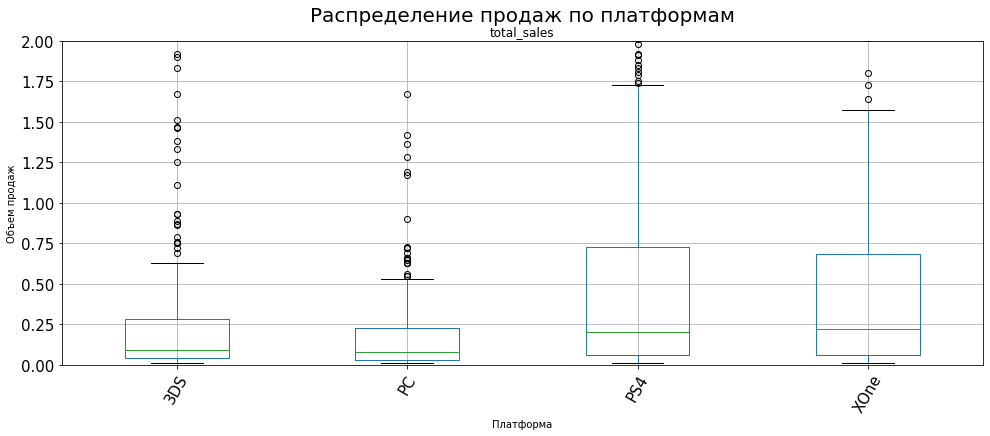

In [67]:
df_platform_best.boxplot('total_sales', by='platform', rot=60, fontsize=15,figsize = (16,6))
plt.ylim(0, 2)
plt.suptitle('Распределение продаж по платформам', size = 20)
plt.ylabel('Объем продаж')
plt.xlabel('Платформа')

Из графика видно:

1. Максимальные значения по продажам из числа перспективных имеет платформа **PS4**, близкое к ней **XOne**, наименьшее у **3DS** и **PS** 

2. Все платформы имеют смещение вправо, что говорит о значительных выбросах.

#### Влияние на продажи популярной платформы PS4 отзывов пользователей и критиков. Рассчет корреляции.

In [68]:
df_score_PS4 = df.query('platform == "PS4"').pivot_table(index=['critic_score','user_score'], values='total_sales', aggfunc='sum').reset_index()

In [69]:
df_score_PS4.columns = ['critic_score', 'user_score', 'total_sales']

Text(0.5, 0.98, 'Зависимость продаж от user_score платформы PS4')

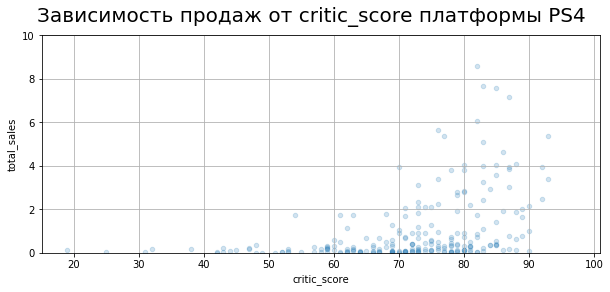

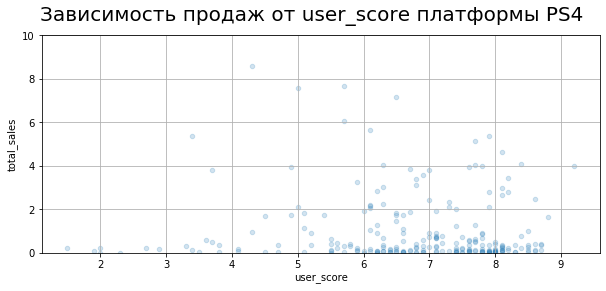

In [70]:
df_score_PS4.plot(x='critic_score', ylim = (0, 10), y='total_sales', kind='scatter', grid =True, figsize=(10,4), alpha = .2)
plt.suptitle('Зависимость продаж от critic_score платформы PS4', size = 20)

df_score_PS4.plot(x='user_score', ylim = (0, 10), y='total_sales', kind='scatter', grid =True, figsize=(10,4), alpha = .2)
plt.suptitle('Зависимость продаж от user_score платформы PS4', size = 20)

In [71]:
df_score_PS4.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.563115,0.422526
user_score,0.563115,1.000000,-0.019075
total_sales,0.422526,-0.019075,1.000000


In [72]:
df_score_total = df.pivot_table(index=['critic_score','user_score'], values='total_sales', aggfunc='sum').reset_index()
df_score_total.columns = ['critic_score', 'user_score', 'total_sales']

In [73]:
df_score_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 3 columns):
critic_score    734 non-null float64
user_score      734 non-null float64
total_sales     734 non-null float64
dtypes: float64(3)
memory usage: 17.3 KB


In [74]:
df_score_total.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.497469,0.365874
user_score,0.497469,1.000000,0.063662
total_sales,0.365874,0.063662,1.000000


#### Вывод

Корреляция продаж от отзывов критиков и отзывов пользователей отличается:

- отзывы критиков прямая слабая

- отзывы пользователей нулевая и даже очень слабая - отрицательная.

В целом, покупатели ориентируются на оценки профессиональных критиков, а отзывы потребителей практически игнорируют.

<div class="alert alert-block alert-info">

V1 
    
* Корреляция оценена по популярной платформе **PS4**
    
* Проведено сравнение результатов по всем платформам актуального периода.
        
</div>

#### Общее распределение игр по жанрам

общие продажи по жанру

In [46]:
df_genre_sales_sum = df.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).reset_index()

df_genre_sales_sum.columns = ['genre', 'total_sales']

средние продажи по жанру

In [47]:
df_genre_sales_mean = df.pivot_table(index = 'genre', values = 'total_sales').sort_values(by = 'total_sales', ascending = False).reset_index()

df_genre_sales_mean.columns = ['genre', 'total_sales']

общее количество игр по жанру

In [48]:
df_genre_name_count = df.pivot_table(index = 'genre', values = 'name', aggfunc = 'count').reset_index()

df_genre_name_count.columns = ['genre', 'count']

df_genre_name_count = df_genre_name_count.sort_values(by = 'count', ascending = False)

среднее количество игр по жанру

In [49]:
#df_genre_name_mean = df.pivot_table(index = 'genre', values = 'name').reset_index()

#df_genre_name_mean.columns = ['genre', 'mean']

#df_genre_name_mean.sort_values(by = 'mean', ascending = False)

Text(0, 0.5, 'количество игр')

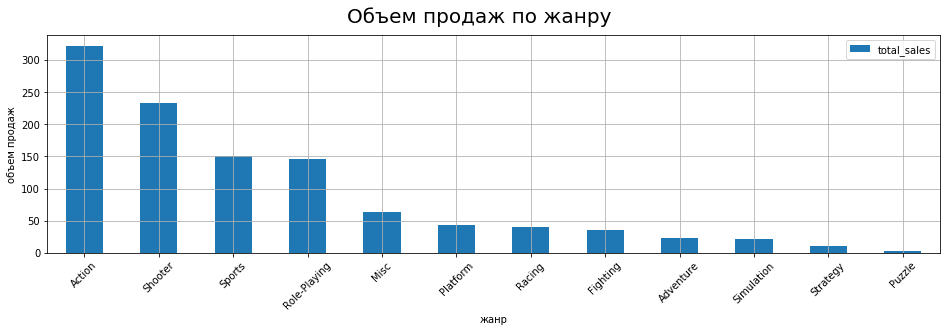

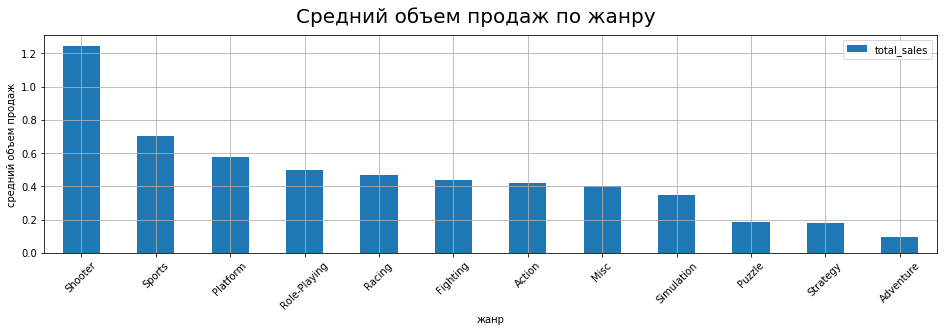

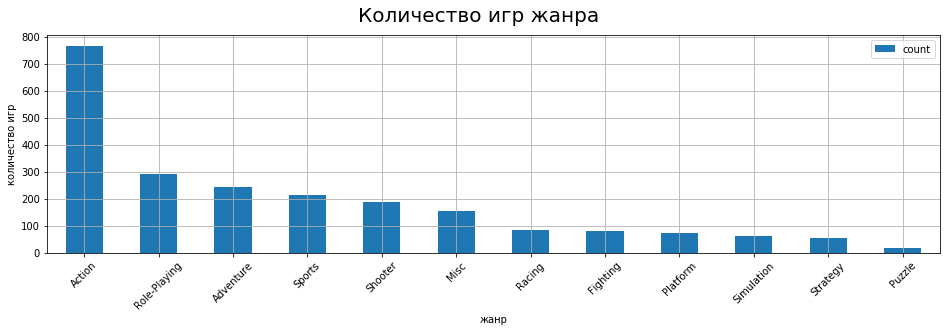

In [50]:
df_genre_sales_sum.plot.bar(x = 'genre',  rot = 45, grid = True, figsize = (16, 4))
plt.suptitle('Объем продаж по жанру', size = 20)
plt.xlabel('жанр')
plt.ylabel('объем продаж')

df_genre_sales_mean.plot.bar(x = 'genre',  rot = 45, grid = True, figsize = (16, 4))
plt.suptitle('Средний объем продаж по жанру', size = 20)
plt.xlabel('жанр')
plt.ylabel('средний объем продаж')

df_genre_name_count.plot.bar(x = 'genre',  rot = 45, grid = True, figsize = (16, 4))
plt.suptitle('Количество игр жанра', size = 20)
plt.xlabel('жанр')
plt.ylabel('количество игр')

#df_genre_name_mean.plot.bar(x = 'genre',  rot = 45, grid = True, figsize = (16, 4))
#plt.suptitle('Объем продаж по жанру', size = 20)
#plt.xlabel('жанр')
#plt.ylabel('объем продаж')

#### Вывод:

Лидеры жанров по объему продаж и по количеству игр - **Action, Shooter**

Жанры с наименьшими продажами и количеству игр - **Simulation, Strategy, Puzzle**

Жанры в топах отличаются из-за разной популярности жанров в регионах. Поэтому следует провести анализ регинов.

<a name="4"></a>
[Назад к оглавлению](#0)
## 4. Портрет пользователя каждого региона

**Определение для пользователя региона NA:**

* Самые популярные платформы (топ-5). Различия в долях продаж.

* Самые популярные жанры (топ-5). Разница.

* Влияние рейтинга ESRB на продажи в отдельном регионе

In [51]:
columns = ['platform', 'genre', 'rating']

for col in columns:
    
    data = df.query('year_of_release > 2012')
    
    display(data.pivot_table(index = col, values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False).head())

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


**Определение для пользователя региона EU:**

* Самые популярные платформы (топ-5). Различия в долях продаж.

* Самые популярные жанры (топ-5). Разница.

* Влияние рейтинга ESRB на продажи в отдельном регионе

In [52]:
columns = ['platform', 'genre', 'rating']

for col in columns:    
    data = df.query('year_of_release > 2012')    
    display(data.pivot_table(index = col, values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False).head())

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


**Определение для пользователя каждого региона JP:**

* Самые популярные платформы (топ-5). Различия в долях продаж.

* Самые популярные жанры (топ-5). Разница.

* Влияние рейтинга ESRB на продажи в отдельном регионе

In [53]:
columns = ['platform', 'genre', 'rating']

for col in columns:
    data = df.query('year_of_release > 2012')
    display(data.pivot_table(index = col, values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False).head())

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


#### Вывод:

1. **PS4** - лидирующая платформа по объему продаж на рынке **na** и **eu**, **3DS** - в регионе **jp** 

2. **Action** - лидирующая платформа по объему продаж на рынке **na** и **eu**, **Role-Playing, Action** - в регионе **jp**

3. Перечень популярных возрастных рейтингов одинаков во всех 3х регионах - **M, E,	E10+, T**, в **jp** -перечень такой же, но другой порядок популярности **T, E,	M, E10+**.


<a name="5"></a>
[Назад к оглавлению](#0)
## 5. Проверка гипотез

<div class="alert alert-block alert-info">

V1 
    
* замены на медианы удалены
        
</div>

Будем проверять нулевую и альтернативную гипотезы:

**1. Средние пользовательские рейтинги платформ Xbox One и PC**

    1.1 Нулевая гипотеза H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

    1.2 Альтернативная гипотеза H1 - Средние пользовательские рейтинги платформ Xbox One и PC отличаются

**2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»)**

    2.1 Нулевая гипотеза H0 - Средние пользовательские рейтинги жанров Action и Sports одинаковые

    2.2 Альтернативная гипотеза H1 - Средние пользовательские рейтинги жанров Action и Sports отличаются
  

Пороговое значение alpha устанавливаем .05 (5%) - порог вероятности крайнего, маловероятного события, т.е., если вероятность ниже, то принято считать, что событие маловероятно

In [54]:
alpha = .05

Для проверки гипотезы используем метод ttest_ind из пакета scipy.stats. P-value — второе значение в массиве, выдаваемом методом ttest_ind. 

К нему обратимся по имени: results.pvalue. 

Если окажется, что значение results_1.pvalue больше alpha, это означает, что гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC не противоречит, меньше - отвергаем.

Если окажется, что значение results_2.pvalue больше alpha, то отвергаем гипотезу о различии средних пользовательских рейтингов жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования»), меньше - опровергнуть гипотезу не удалось.

<div class="alert alert-block alert-danger">
<b>КОММЕНТАРИЙ РЕВЬЮВЕРА:</b> 
    
Никакие экспериментально полученные данные <b>никогда не подтвердят</b> какую-либо гипотезу. Это наше фундаментальное ограничение. Данные могут лишь не противоречить ей или, наоборот, показывать крайне маловероятные результаты (при условии, что гипотеза верна). Но и в том, и в другом случае нет оснований утверждать, что выдвинутая гипотеза доказана.
Допустим, данные гипотезе не противоречат, тогда мы её не отвергаем. Если же мы приходим к выводу, что получить такие данные в рамках этой гипотезы вряд ли возможно, у нас появляется основание отбросить эту гипотезу.
    
</div>

<a name="5.1"></a>
[Назад к оглавлению](#0)
### 5.1 Проверка гипотезы cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза H0 - cредние пользовательские рейтинги платформ Xbox One и PC одинаковые

платформа Xbox One

In [55]:
df_xone = df.query('platform == "XOne"')

платформа PC

In [56]:
df_pc = df.query('platform == "PC"')

In [57]:
results_1 = st.ttest_ind(df_xone.user_score, df_pc.user_score, equal_var=True, nan_policy='omit')
results_1

Ttest_indResult(statistic=1.4788255981357332, pvalue=0.1401265840361139)

In [58]:
print('p-значение:', results_1.pvalue)
if results_1.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1401265840361139
Не получилось отвергнуть нулевую гипотезу


<a name="5.2"></a>
[Назад к оглавлению](#0)
### 5.2 Проверка гипотезы cредние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

жанр Аction

In [59]:
df_action = df.query('genre == "Action"')

жанр Sports

In [60]:
df_sports = df.query('genre == "Sports"')

In [61]:
results_1 = st.ttest_ind(df_action.user_score, df_sports.user_score, equal_var=True, nan_policy='omit')
results_1

Ttest_indResult(statistic=11.535100577928215, pvalue=1.0517832389142297e-27)

In [62]:
print('p-значение:', results_1.pvalue)
if results_1.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0517832389142297e-27
Отвергаем нулевую гипотезу


<a name="6"></a>
[Назад к оглавлению](#0)
### 6. Вывод.

В ходе анализа имеющихся данных удалось выявить закономерности, определяющие успешность игры:
    
1. Наиболее перспективны платформы PS4, XOne, менее 3DS, PC , охватывающие типы стационарных и портативных консолей и персональных компьютеров.

2. Не сильно влияет хорошая оценка профессиональных критиков

3. Жанр  Action, Shooter

4. Возрастной жанр M, E, E10+, T.

 Средние пользовательские рейтинги платформ Xbox One и PC скорее одинаковые.
 
 Средние пользовательские рейтинги жанров Action и Sports разные.

**Наиболее перспективна игра в жанре Action категории "Для взрослых" для игровой консоли PS4, при этом следует уделить особое внимание оценке критиков**